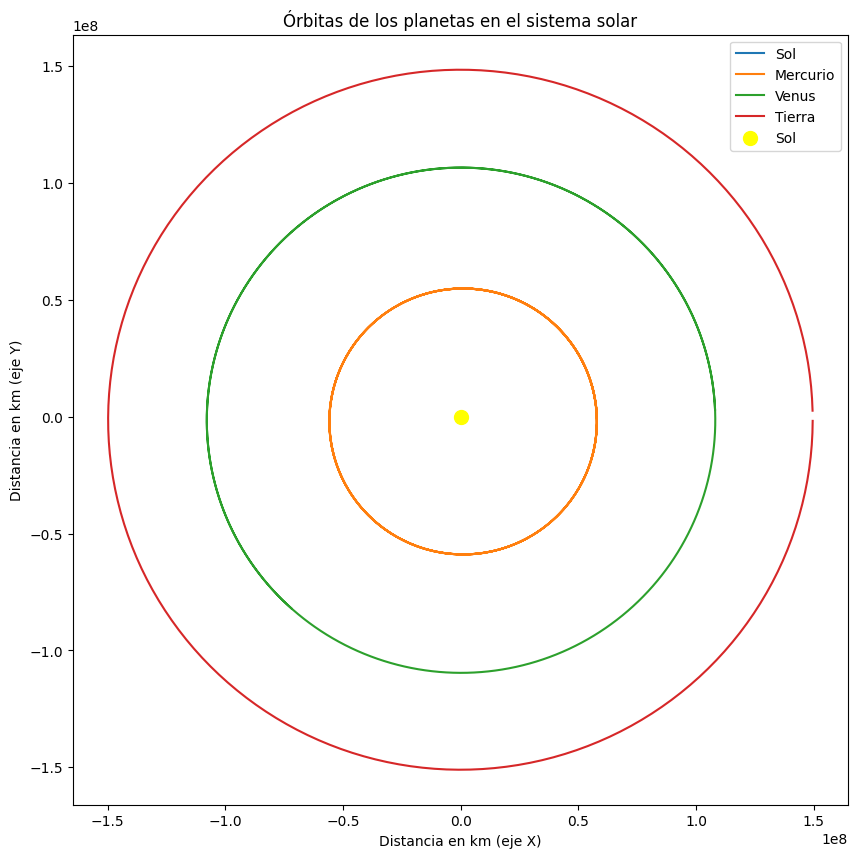

In [2]:
import numpy as np  #importamos numpy que nos sirve para las operaciones matematicas
import matplotlib.pyplot as plt  #importamos matplotlib para poder visualizar en graficos

G = 6.67430e-20  #esta es la constante gravitacional en  km^3/kg^1*s^2 ya que tube que hacer una converscion de metros cubicos a km cubicos por como quice abordar el programa

#aqui defini las variables iniciales masa en KG, velocidades en KM/S y las posicione iniciales que se obtuvieron como fuente la nasa ya que son valores que ya estan calculados para poder usarse para fines educativos o a convenir
#y y los e elevado a algo son porque son valores muy gigantes con 0 y asi se simplifica y el np array es imprecindible para poder hacer lso calculos matematicos de manera eficiente
planetas = {
    'Sol': {'masa': 1.989e30, 'velocidad': np.array([0.0, 0.0]), 'pos': np.array([0.0, 0.0])},
    'Mercurio': {'masa': 3.30e23, 'velocidad': np.array([0.0, 47.4]), 'pos': np.array([57.9e6, 0.0])},
    'Venus': {'masa': 4.87e24, 'velocidad': np.array([0.0, 35.0]), 'pos': np.array([108.2e6, 0.0])},
    'Tierra': {'masa': 5.97e24, 'velocidad': np.array([0.0, 29.8]), 'pos': np.array([149.6e6, 0.0])}
}

#preferi usar un diccionario envez de una lista para guardar las orbitas de cada planeta ya que es mas eficiente para obtener los valores para efectuar los calculos matematicos
orbitas = {nombre: [] for nombre in planetas}

segundosdia = 86400  #es la cantidad de segundos en un dia que necesitaremos para los calculos para cada dia de cada planeta
dias = 365  #son los 365 dias del año los cuales se necesitan para generar la orbita completa

#con este for vamos a hacer la simulación para los planetas usando las leyes de newton
for simulacion in range(dias): #que va repetir cada dia en un numero total de los 365 definidos
    for nombre, planeta in planetas.items(): #aqui menciona para cada planeta en el diccionario creado llamando su masa velocidad y posicion con .items()
        fuerzatotal = np.zeros(2) #se inicia el vector fuerza total en cero para cada dia para que no use los valores de dias antiguos y tener los calculos mas precisos sin problemas

        for nombresiguiente, planetasiguiente in planetas.items(): #aqui vamos a interactuar un planeta con otro para calcular la interaccion gravitacional
            if nombre != nombresiguiente:#esta condicion es importantisima ya que osino calculaba las interacciones gravitaciones  de un planeta consigo mismo dando datos erroneos
                vectorpos = planeta['pos'] - planetasiguiente['pos'] #creamos el vector posicion para poder calcular la posicion entre dos planetas
                distancia = np.linalg.norm(vectorpos) #ahora obtenemos la distancia entre 2 planetas y para eso usamos np.linalg.norm para calcular la norma o magnitud que vendria siendo la distancia
                #ahora se aplica la formula de la ley de gravitacion universal de newton para calcular la fuerza
                #PERO como estamos usando un vector y su magnitud, que es para saber la direccion en 2D o 3D el vector unitario que apunta al otro planeta seria  ->r/r
                #y al multiplicarlo queda en r al cubo y el signo negativo es porque es una fuerza atractiva y va en direccion opuesta al vector posicion
                fuerza = -G * planeta['masa'] * planetasiguiente['masa'] / distancia**3 * vectorpos
                fuerzatotal += fuerza #y finalmente se suma la fuerza al vector de fuerzatotal ya que es el que debe volver a 0 cada dia

        #ahora calculando la velocidad usando la segunda ley de newton para cada dia, en la velocidad  que ues v=v0+at  y al despejar la aceleracion queda a=F/m que dando la formula en v=v0+(F/m)*t
        #recordando que v0 y r0 son las condiciones iniciales del dia anterior por lo que el bucle for se encargaria
        planeta['velocidad'] += fuerzatotal / planeta['masa'] * segundosdia
        # y actualizando la posicion del planeta con su nueva velocidad en el nuevo dia r=r0+vt
        planeta['pos'] += planeta['velocidad'] * segundosdia
        #y ahora guarda la posicion del nuevo dia en la lista correspondiente del diccionario orbita
        orbitas[nombre].append(planeta['pos'].copy())


#ahora configuramos el grafico para vizualizar usando la libreria de matplot
plt.figure(figsize=(10, 10))#es el tamaño del grafico que use para que se viera bien
for nombre, posiciones in orbitas.items(): # con este for llamo las posiciones para cada dia por un año (365) guardadas en las listas del diccionario para que se grafiquen
    posiciones = np.array(posiciones)
    plt.plot(posiciones[:, 0], posiciones[:, 1], label=nombre)
plt.scatter(0, 0, color='yellow', label='Sol', s=100) #fue necesario poner al sol al medio para que se viera mas bonito de color amarillo  en la posicion 0.0 ya que no salia
plt.xlabel('Distancia en km (eje X)') #las distancias son tan grandes en KM que se tienen que poner con e, elevado ya que son muchos 0
plt.ylabel('Distancia en km (eje Y)')
plt.title('Órbitas de los planetas en el sistema solar') #titulo grafico
plt.legend()
plt.show()
